In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import SpatialDE
# import NaiveDE
# import SpaGCN as spg
# from scipy.sparse import issparsez
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc

In [2]:
import sys
sys.path.append('../../')

from plotting import cellscollocplot

import utils

# Config

In [14]:
# set global rc parameters
# sc.settings.set_figure_params(vector_friendly=True)

utils.config_rc(dpi=300, font_size=5)
# mpl.rcParams
wk_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))

In [4]:

adata = sc.read_h5ad(os.path.join(wk_root, 'result/svg/IDC/adata_IDC.h5ad'))
annotation =pd.read_csv(os.path.join(wk_root, 'result/svg/IDC/IDC1_annotations.csv')).set_index('spot')
cell2loc_ann = pd.read_csv(os.path.join(wk_root, 'result/svg/IDC/IDC_celltype_matrix.csv')).set_index('Unnamed: 0')

adata.obs['annotation'] = annotation
adata.obs['annotation'] = adata.obs['annotation'].astype('category')
adata.obsm['cell2loc'] = cell2loc_ann

In [5]:
adata

AnnData object with n_obs × n_vars = 4727 × 19437
    obs: 'in_tissue', 'array_row', 'array_col', 'pxl_col_in_fullres', 'pxl_row_in_fullres', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters', 'spot_neighbors', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'SpaSEG_clusters_colors', 'metrics', 'pca', 'raw_domain_lr_means', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'cell_types', 'spatial', 'spot_lr_padj', 'spot_lr_score', 'cell2loc'
    varm: 'PCs'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [6]:
# adata.write_h5ad(os.path.join(wk_root, 'notebook/results/SVG/IDC_w_anno.h5ad'))

In [18]:
idc_wk_anno_root = utils.get_path('idc_wk_anno_root', json_path=os.path.join(wk_root, '_data.json'))
spearman_df =pd.read_csv(os.path.join(idc_wk_anno_root, 'IDC_celltype_colocalization.csv')).set_index('Unnamed: 0')
# spearman_df.head()
for i in range(spearman_df.shape[0]):
    spearman_df.iloc[i,i] = -1

In [19]:
spearman_df.head()

,B cells Memory,B cells Naive,CAFs MSC iCAF-like,CAFs myCAF-like,Cancer Basal SC,Cancer Cycling,Cancer Her2 SC,Cancer LumA SC,Cancer LumB SC,Cycling PVL,...,Mature Luminal,Monocyte,Myoepithelial,NK cells,NKT cells,PVL Differentiated,PVL Immature,Plasmablasts,T cells CD4+,T cells CD8+
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
B cells Memory,-1.000000,-0.456553,0.845545,0.249824,-0.699083,-0.372583,-0.528207,-0.523789,-0.527670,0.029142,...,-0.469388,0.738293,-0.172914,0.601581,0.638016,0.531500,0.750155,0.753430,0.827380,0.702004
B cells Naive,-0.456553,-1.000000,-0.472967,-0.468456,0.663489,0.137216,0.477730,0.165386,0.654142,-0.025025,...,0.668759,-0.461502,0.022184,-0.251093,-0.485938,-0.406631,-0.554104,-0.523720,-0.487198,-0.478541
CAFs MSC iCAF-like,0.845545,-0.472967,-1.000000,0.154657,-0.624035,-0.609765,-0.365197,-0.659788,-0.361141,0.011371,...,-0.419628,0.745788,-0.370875,0.392783,0.750275,0.551171,0.841442,0.866765,0.901732,0.803641
CAFs myCAF-like,0.249824,-0.468456,0.154657,-1.000000,-0.376122,0.199715,-0.411723,0.193594,-0.683625,0.330263,...,-0.552758,0.225501,0.331676,0.182234,0.373892,0.109935,0.190156,0.221377,0.224392,0.317178
Cancer Basal SC,-0.699083,0.663489,-0.624035,-0.376122,-1.000000,0.234499,0.571873,0.401435,0.683841,-0.064620,...,0.606414,-0.615135,0.127389,-0.444672,-0.550909,-0.441030,-0.633725,-0.604338,-0.653998,-0.586794


In [20]:
col_collocal = pd.DataFrame(index = spearman_df.index)
col_collocal['col_ct'] = spearman_df.idxmax()
col_collocal['spearman'] = spearman_df.max()
col_collocal

,col_ct,spearman
Unnamed: 0,,
B cells Memory,CAFs MSC iCAF-like,0.845545
B cells Naive,Mature Luminal,0.668759
CAFs MSC iCAF-like,T cells CD4+,0.901732
CAFs myCAF-like,Cycling_Myeloid,0.520696
Cancer Basal SC,Cancer LumB SC,0.683841
Cancer Cycling,Myoepithelial,0.744470
Cancer Her2 SC,Cancer LumB SC,0.700193
Cancer LumA SC,Cancer Cycling,0.720089
Cancer LumB SC,Mature Luminal,0.721044


In [12]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist1 = ['#f0f0f0','#dfc27d','#a6611a']
clist2 = ['#f0f0f0','#80cdc1','#018571']

clist3 = ['#f0f0f0','#f1b6da','#d01c8b']
clist4 = ['#f0f0f0','#b8e186','#4dac26']

clist5 = ['#f0f0f0','#fdb863','#e66101']
clist6 = ['#f0f0f0','#b2abd2','#5e3c99']

clist7 = ['#f0f0f0','#f4a582','#ca0020']
clist8 = ['#f0f0f0','#92c5de','#0571b0']

cmap1 = LinearSegmentedColormap.from_list('cmap1',clist1,N=256)
cmap2 = LinearSegmentedColormap.from_list('cmap2',clist2,N=256)
cmap3 = LinearSegmentedColormap.from_list('cmap3',clist3,N=256)
cmap4 = LinearSegmentedColormap.from_list('cmap4',clist4,N=256)
cmap5 = LinearSegmentedColormap.from_list('cmap5',clist5,N=256)
cmap6 = LinearSegmentedColormap.from_list('cmap6',clist6,N=256)
cmap7 = LinearSegmentedColormap.from_list('cmap7',clist7,N=256)
cmap8 = LinearSegmentedColormap.from_list('cmap8',clist8,N=256)

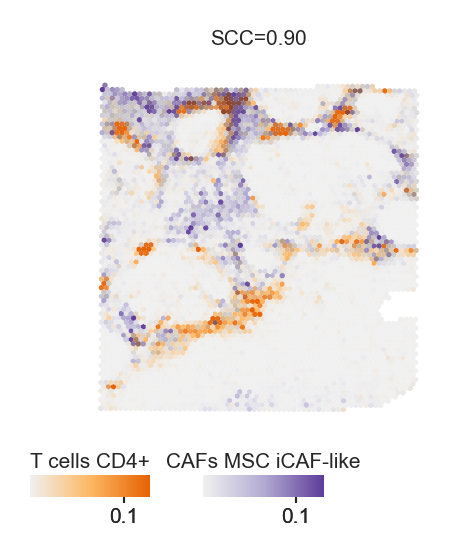

In [49]:
cts = ['T cells CD4+','CAFs MSC iCAF-like']
ax = cellscollocplot(adata, cts, cmaps=[cmap5,cmap6], fig_w = 5*utils.centimeter,
                     fig_h = 4*utils.centimeter, spot_size=1,size=1, alpha_scaling=1.0,marker='o',rasterized=True)

ax.set_title('SCC={0:.2f}'.format(spearman_df.loc[cts[0],cts[1]]))
plt.savefig(os.path.join(wk_root, "notebook/results/CCI/IDC_coloc_{0}.pdf".format('|'.join(cts))), bbox_inches='tight', format='pdf', dpi=400)

Text(0.5, 1.0, 'SCC=0.74')

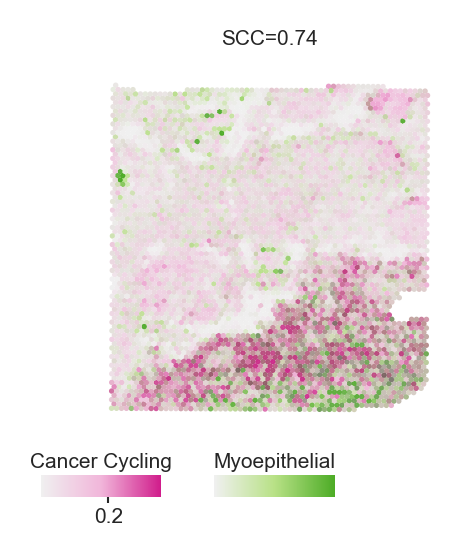

In [56]:
cts = ['Cancer Cycling','Myoepithelial']
ax = cellscollocplot(adata, cts, cmaps=[cmap3,cmap4], fig_w = 5*utils.centimeter,
                     fig_h = 4*utils.centimeter, spot_size=1,size=1, alpha_scaling=1.0,marker='o',rasterized=True)

ax.set_title('SCC={0:.2f}'.format(spearman_df.loc[cts[0],cts[1]]))
# plt.savefig(os.path.join(wk_root, "notebook/results/CCI/IDC_coloc_{0}.pdf".format('|'.join(cts))), bbox_inches='tight', format='pdf', dpi=400)